In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

# 📦 Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🪶 Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Load YOLO training results
csv_path = "./results.csv"
df = pd.read_csv(csv_path)
df.head()


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,239.867,1.46315,2.84559,1.54294,0.17102,0.43484,0.18704,0.07856,2.05032,5.84986,2.81502,0.000549,0.000549,0.000549
1,2,492.643,1.69066,2.13935,1.74420,0.14741,0.19172,0.08942,0.03610,2.04634,8.06494,2.49970,0.001087,0.001087,0.001087
2,3,748.243,1.70690,2.08135,1.77233,0.22538,0.16853,0.09542,0.03907,2.19556,8.89079,2.63398,0.001606,0.001606,0.001606
3,4,996.543,1.68924,2.05020,1.75371,0.39744,0.33379,0.29701,0.13670,2.00844,3.43019,2.32629,0.001584,0.001584,0.001584
4,5,1249.200,1.64832,2.01310,1.73870,0.44045,0.48848,0.41800,0.20567,1.80493,3.02187,2.03211,0.001557,0.001557,0.001557


In [3]:
print("Available columns in results.csv:")
print(df.columns.tolist())

Available columns in results.csv:
['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


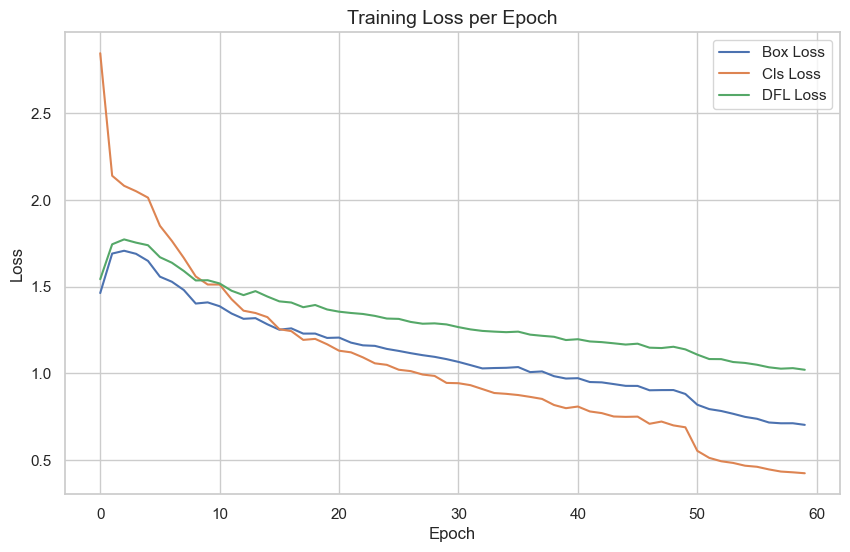

In [4]:
loss_cols = ["train/box_loss", "train/cls_loss", "train/dfl_loss"]

df[loss_cols].plot()
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Box Loss", "Cls Loss", "DFL Loss"])
plt.show()

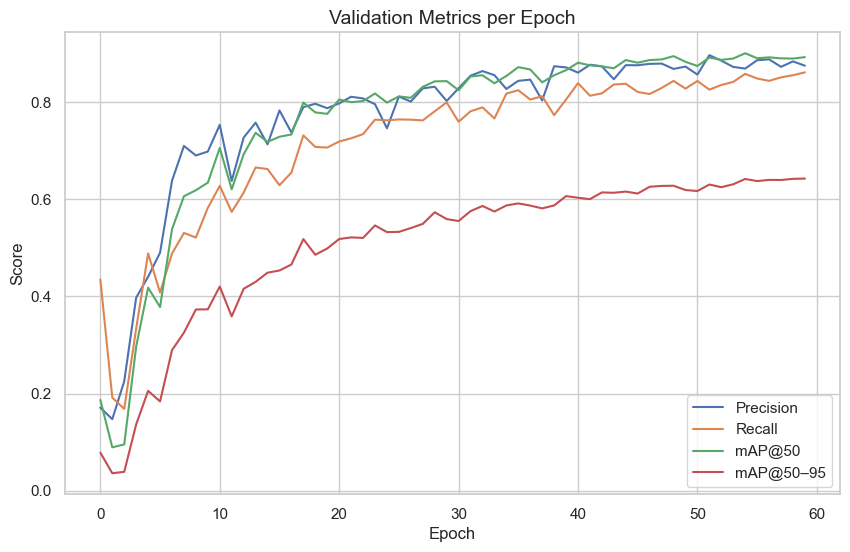

In [5]:
metric_cols = [
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)"
]

df[metric_cols].plot()
plt.title("Validation Metrics per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend(["Precision", "Recall", "mAP@50", "mAP@50–95"])
plt.show()

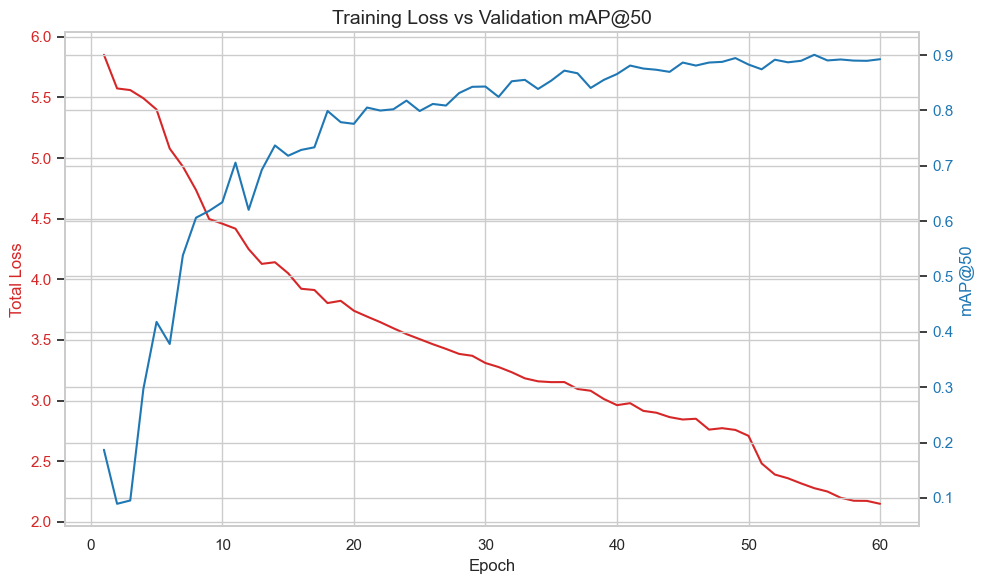

In [6]:
# Combine losses for overview
df["train/total_loss"] = (
    df["train/box_loss"] + df["train/cls_loss"] + df["train/dfl_loss"]
)

fig, ax1 = plt.subplots()

# Total loss curve
ax1.plot(df["epoch"], df["train/total_loss"], color="tab:red", label="Total Training Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Total Loss", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# mAP@50 curve
ax2 = ax1.twinx()
ax2.plot(df["epoch"], df["metrics/mAP50(B)"], color="tab:blue", label="mAP@50")
ax2.set_ylabel("mAP@50", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Training Loss vs Validation mAP@50")
fig.tight_layout()
plt.show()

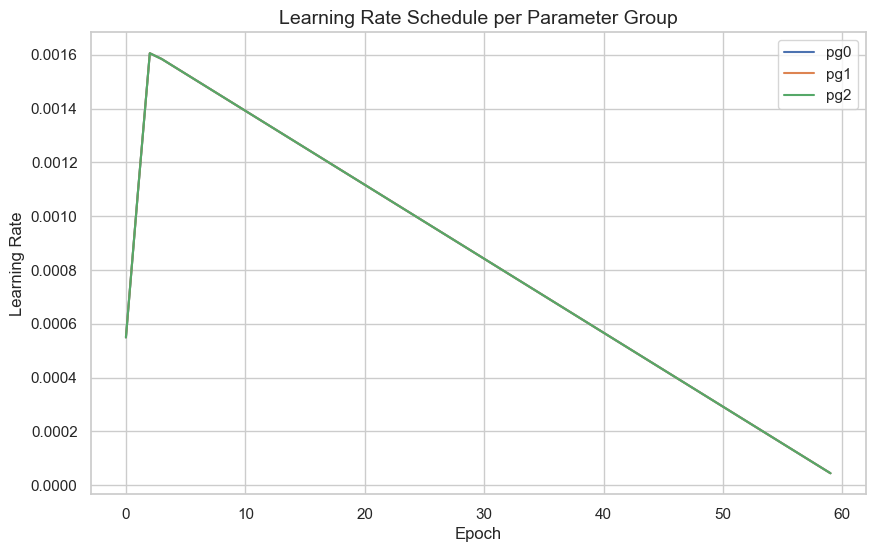

In [7]:
lr_cols = ["lr/pg0", "lr/pg1", "lr/pg2"]

df[lr_cols].plot()
plt.title("Learning Rate Schedule per Parameter Group")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.legend(["pg0", "pg1", "pg2"])
plt.show()

In [8]:
# Define column groups

# Training loss components
loss_cols = ["train/box_loss", "train/cls_loss", "train/dfl_loss"]

# Validation loss components
val_loss_cols = ["val/box_loss", "val/cls_loss", "val/dfl_loss"]

# Validation metrics
metric_cols = [
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)"
]

# Learning rate schedule
lr_cols = ["lr/pg0", "lr/pg1", "lr/pg2"]

In [9]:
import os

save_dir = "runs/weapons_yolo11n/plots"
os.makedirs(save_dir, exist_ok=True)

def save_plot(cols, title, filename, ylabel="Value"):
    ax = df[cols].plot(title=title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(ylabel)
    fig = ax.get_figure()
    fig.savefig(f"{save_dir}/{filename}", bbox_inches="tight")
    plt.close(fig)

# Save key plots
save_plot(loss_cols, "Training Loss per Epoch", "train_loss.png", "Loss")
save_plot(val_loss_cols, "Validation Loss per Epoch", "val_loss.png", "Loss")
save_plot(metric_cols, "Validation Metrics per Epoch", "val_metrics.png", "Score")
save_plot(lr_cols, "Learning Rate Schedule", "lr_schedule.png", "Learning Rate")

print(f"✅ Saved all plots to: {save_dir}")

✅ Saved all plots to: runs/weapons_yolo11n/plots


In [10]:
best_epoch = df["metrics/mAP50(B)"].idxmax()
print(f"🏆 Best Epoch: {int(df.loc[best_epoch, 'epoch'])}")
print(df.loc[best_epoch, [
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)"
]])

🏆 Best Epoch: 55
metrics/precision(B)    0.86889
metrics/recall(B)       0.85805
metrics/mAP50(B)        0.90042
metrics/mAP50-95(B)     0.64169
Name: 54, dtype: float64
